# Importing Libraries

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

plt.style.use('ggplot')

# Performing EDA (Exploratory Data Analysis)

Guid to Performing EDA on a Dataset 

The basic steps of EDA: 

    - Understanding the data: what are the variables, number of columns and rows
    
    - Clean the data from the redundancies, such as outliers causing overfitting or underfitting 
    
    - Analyse the relationship between the variables. 

In [2]:
# Importing dataset
data = pd.read_csv("ACME-HappinessSurvey2020.csv")

Understanding the data:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order 

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me 

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.


In [3]:
# Undertsanding the data, checking the first 5 rows of the data
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
# Understanding the data, checking the last 5 rows of the data
data.tail()

,Y,X1,X2,X3,X4,X5,X6
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5
125,0,5,3,2,5,5,5


In [5]:
data.shape # checking the shape of the data

(126, 7)

In [6]:
data.describe() # the stats of the data, mean, mediun, max and min, and std value of the data

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [7]:
data.columns

Index(['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6'], dtype='object')

In [8]:
# check for the nuniuqe values, a function which returns distinct observations

data.nunique()

Y     2
X1    4
X2    5
X3    5
X4    5
X5    5
X6    5
dtype: int64

In [9]:
data['X1'].unique()
# The result depicts the unique values from each column, so we can see below the unique values attributed to column X1
# Which is "my order was delivered on time" has 4 unique values.  

array([3, 5, 4, 1])

# Cleaning the Dataset

In [10]:
#Check for the null vlaues 

data.isnull().sum()

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64

In [11]:
# There are no null values

In [12]:
# Removing outliers: indicating experimental errors

# Relationship Analysis

Relationship analysis follows from a correlation matrix: giving a wider perspective on the data we are dealing with, it is a table which shows the correlation coefficients between variables. 

Used to summeraize data as an input into an advanced analysis and as a diagnostic for advanced analysis 

In [13]:
corr = data.corr()
corr  # we are seeing the relation between variables

,Y,X1,X2,X3,X4,X5,X6
Y,1.000000,0.280160,-0.024274,0.150838,0.064415,0.224522,0.167669
X1,0.280160,1.000000,0.059797,0.283358,0.087541,0.432772,0.411873
X2,-0.024274,0.059797,1.000000,0.184129,0.114838,0.039996,-0.062205
X3,0.150838,0.283358,0.184129,1.000000,0.302618,0.358397,0.203750
X4,0.064415,0.087541,0.114838,0.302618,1.000000,0.293115,0.215888
X5,0.224522,0.432772,0.039996,0.358397,0.293115,1.000000,0.320195
X6,0.167669,0.411873,-0.062205,0.203750,0.215888,0.320195,1.000000


<AxesSubplot:>

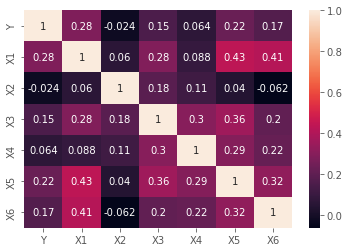

In [14]:
sns.heatmap(corr, annot=True)
# a heatmap to illustrate the relation even further

# X2 and X4 do not correlate strongly with Y.

# Classification

- logisitc regression or naive bayes 
- tree based model, decision tree (random forest)
- boosting model: works better than logistic and naive
        - instal through terminal 
    - lightGBM 
    - CatBoost (might perform better) :use this
    - feature selection befroe training 
    - training the model with the default setting (simple training)
        - feature selection after model result 
            - features does not contirubte to the output then remove 
    - hyperparamater tuning 
        - GridSearch (good for few paramters)
        - randomsearch (better option)
K-Fold

try different models, then use training to choose best model, apply hyper paramater tuning to optimise paramters. 
spliting the training and testing data set, randomly splitting the data set, the class balancing will not be balance

skitkit learn for splitting the data, paramter; train_tets_split... (keep true) 
then the data set can remain balanced. 


for next session, try run the three models, 

.

# Splitting the Data in Training and Testing

In [15]:
data 

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5
...,...,...,...,...,...,...,...
121,1,5,2,3,4,4,3
122,1,5,2,3,4,2,5
123,1,5,3,3,4,4,5
124,0,4,3,3,4,4,5


In [16]:
x = data.drop('Y',axis=1)
y = data.Y
y.values.reshape(-1,1)

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
x_dev,x_test,y_dev,y_test = train_test_split(x_test,y_test,test_size=0.5)

In [17]:
# Scaling the data 

scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_dev = scaler.transform(x_dev)
x_test = scaler.transform(x_test)

# Feature Selection

In [18]:
X_clf=data.iloc[:,1:6] # features: 
y_clf=data.iloc[:,0] # Target variable
print(X_clf)
print(y_clf)

     X1  X2  X3  X4  X5
0     3   3   3   4   2
1     3   2   3   5   4
2     5   3   3   3   3
3     5   4   3   3   3
4     5   4   3   3   3
..   ..  ..  ..  ..  ..
121   5   2   3   4   4
122   5   2   3   4   2
123   5   3   3   4   4
124   4   3   3   4   4
125   5   3   2   5   5

[126 rows x 5 columns]
0      0
1      0
2      1
3      0
4      0
      ..
121    1
122    1
123    1
124    0
125    0
Name: Y, Length: 126, dtype: int64


In [19]:
X_clf_new=SelectKBest(score_func=chi2,k=3).fit_transform(X_clf,y_clf)

In [20]:
X_clf_new_train,X_clf_new_test,y_train,y_test = train_test_split(X_clf_new,y,test_size=0.3)
X_clf_new_dev,X_clf_new_test,y_dev,y_test = train_test_split(X_clf_new_test,y_test,test_size=0.5)

In [44]:
scaler = StandardScaler().fit(X_clf_new_train)
x_train_new = scaler.transform(X_clf_new_train)
x_dev_new = scaler.transform(X_clf_new_dev)
x_test_new = scaler.transform(X_clf_new_test)

# Logisitc Regression 

In [45]:
# fit a simple logistic regression
lr = LogisticRegression()
lr.fit(x_train_new,y_train)

# predict on the test set and get the test accuracy:
y_pred = lr.predict(x_test_new)
accuracy_score(y_test, y_pred)

0.47368421052631576

# Tree Based Model: Decision Tree

In [84]:
clf_tree = DecisionTreeClassifier(min_samples_split=3,)
clf_tree.fit(x_train_new,y_train)
pred = clf_tree.predict(x_train_new)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       0.79      0.84      0.81        44
           1       0.83      0.77      0.80        44

    accuracy                           0.81        88
   macro avg       0.81      0.81      0.81        88
weighted avg       0.81      0.81      0.81        88

Training accuracy: 0.807


In [85]:
pred = clf_tree.predict(x_dev_new)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

Dev set Report
               precision    recall  f1-score   support

           0       0.43      0.50      0.46         6
           1       0.75      0.69      0.72        13

    accuracy                           0.63        19
   macro avg       0.59      0.60      0.59        19
weighted avg       0.65      0.63      0.64        19

Dev set accuracy: 0.632
AUC: 0.596


## Random Forest

In [48]:
clf = RandomForestClassifier(n_estimators=300)
clf.fit(x_train_new,y_train)
pred = clf.predict(x_train_new)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.80      0.84      0.82        44

    accuracy                           0.82        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.82      0.82      0.82        88

Training accuracy: 0.818


In [47]:
pred = clf.predict(x_dev_new)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

# AUC of 68.4%

Dev set Report
               precision    recall  f1-score   support

           0       0.50      0.33      0.40         6
           1       0.73      0.85      0.79        13

    accuracy                           0.68        19
   macro avg       0.62      0.59      0.59        19
weighted avg       0.66      0.68      0.66        19

Dev set accuracy: 0.684
AUC: 0.590


# Hyperparamter Tuning on Random Forest

In [87]:
print(clf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 300, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


n_estimators = number of trees in the foreset

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

bootstrap = method for sampling data points (with or without replacement)

In [34]:
# To use RandomizedSearchCV, we first need to create a parameter grid to sample from during fitting:

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid) 

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [76]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring = "accuracy")
# Fit the random search model
rf_random.fit(x_train_new, y_train)
print(rf_random.best_params_)
# rf_random.best_params

Fitting 3 folds for each of 100 candidates, totalling 300 fits
{'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': True}


In [75]:
print(rf_random.best_params_)

{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': True}


In [81]:
base_model = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt', max_depth = 110, bootstrap = True) # manuelly put n_estimators in parameters 
base_model.fit(x_train_new, y_train)
pred = base_model.predict(x_train_new)
print('Training Report\n {}'.format(classification_report(y_train,pred)))
print('Training accuracy: {:.3f}'.format(accuracy_score(y_train,pred)))

Training Report
               precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.80      0.84      0.82        44

    accuracy                           0.82        88
   macro avg       0.82      0.82      0.82        88
weighted avg       0.82      0.82      0.82        88

Training accuracy: 0.818


In [82]:
pred = base_model.predict(x_dev_new)
print('Dev set Report\n {}'.format(classification_report(y_dev,pred)))
print('Dev set accuracy: {:.3f}'.format(accuracy_score(y_dev,pred)))
print('AUC: {:.3f}'.format(roc_auc_score(y_dev,pred)))

# AUC of 73.3% 

Dev set Report
               precision    recall  f1-score   support

           0       0.60      0.50      0.55         6
           1       0.79      0.85      0.81        13

    accuracy                           0.74        19
   macro avg       0.69      0.67      0.68        19
weighted avg       0.73      0.74      0.73        19

Dev set accuracy: 0.737
AUC: 0.673


# Model Explanation

In the respective project we were given the key objective of predicting if a customer is happy or not based on the questions asked about their order. The questions were given the attributes X1, X2...Xn, while the final response of "yes" or "no" was giventhe attribute Y.

To predict the the accuracy of the customers being happy or not were done in the following steps: 

* We first performed EDA, cleaning the data and seeing which features had the highest correlation 
* Then we split our data into training and testing. We applied feature selection, that reduced the number of input variables when developing our three predictive models (Logistic Regression, Decision Tree and Random Forest)
* Next we were able to train our data and get our respetive accuracy scores
* After training each model produced different accuracy scores based on our actual data, in this Random Forest performed the best, with an accuracy rate of 68.4%. This depicts our algorithm to have predicted that 68.4% of customers were satisfied with their order based on the questions asked. 
* Finally, by applying hyperparamter tuning on RandomForestClassifier we can see the accuracy rate increase from its orginal score of 68.4% to 75.7%. 